In [2]:
import copy

import numpy as np
from numpy import nan
import scipy as sp
import sklearn as sk

import pandas as pd

import math as m # math stuff
import random as rd #always good to have
import matplotlib.pyplot as plt #plots.


import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import functools as ft

import itertools
import os

import sys
if sys.version_info[0] < 3:
    from StringIO import StringIO
else:
    from io import StringIO

np.random.seed(1234)
print("Import finished, \nhere's a random number:",rd.random(),"\nIf the number changed, the cell ran correctly. ")

Import finished, 
here's a random number: 0.18858343219829954 
If the number changed, the cell ran correctly. 


In [3]:
from google.colab import drive

drive.mount('/content/gdrive/')

os.chdir("/content/gdrive//MyDrive/SIMS") # change to your directory
print("The path is:", os.getcwd() )
print("All the files are: ",os.listdir())

Mounted at /content/gdrive/
The path is: /content/gdrive/MyDrive/SIMS
All the files are:  ['testAlleleData', 'RR_Gain.csv', 'RR_Gain_STD.csv', 'RR_PCC.csv', 'RR_PCC_STD.csv', 'RR_Variance.csv', 'RR_Variance_STD.csv', 'ANN_Gain.csv', 'ANN_Gain_STD.csv', 'ANN_PCC.csv', 'ANN_PCC_STD.csv', 'ANN_VAR.csv', 'ANN_VAR_STD.csv', 'SimPlots (1).ipynb', 'Generalization Plots.gsheet']


LINE PLOTS: Gain, Model Performance, Variance

Gain


In [71]:
startList = [1,7,13]



results = pd.read_csv("ANN_Gain.csv")
results = results.drop(results[results['Gen']=='Variety'].index)


allYs = list()
x_lab = [" ","C1"," "," "," "," "," "," "," ","C2"," "," "," "," "," "," ","C3"," "," "," "," "," "," "]
x = list(range(0,23))

for dims in startList:
  y = results.iloc[:,dims:dims+6]
  allYs.append(y)

std = pd.read_csv("ANN_Gain_STD.csv")
std = std.drop(std[std['Gen']=='Variety'].index)

allSTD = list()
for dims in startList:
  y = std.iloc[:,dims:dims+6]
  allSTD.append(y)



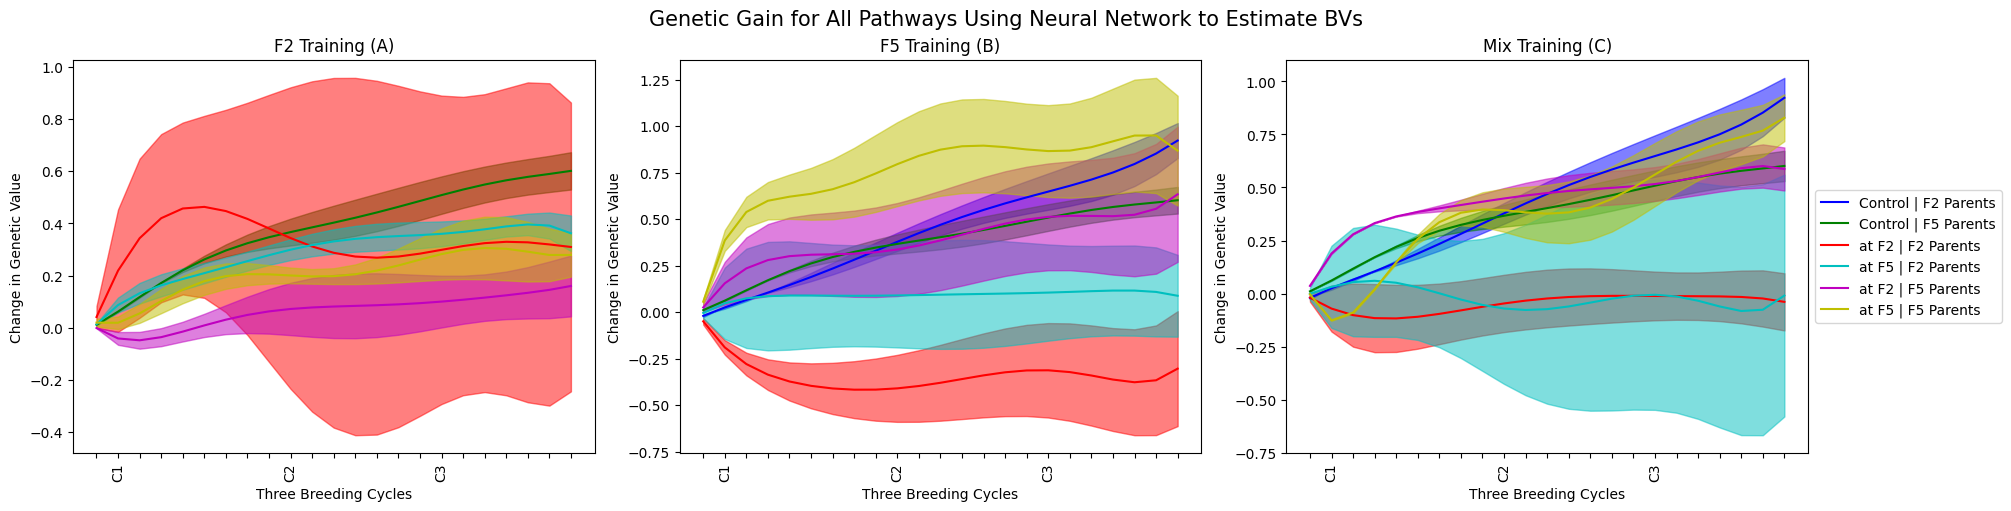

In [75]:
labels = ["F2 Training (A)", "F5 Training (B)", "Mix Training (C)"]
sublabels = ["Control | F2 Parents", "Control | F5 Parents", "at F2 | F2 Parents", "at F5 | F2 Parents", "at F2 | F5 Parents", "at F5 | F5 Parents"]
x = np.array(x)
x = x.flatten()

fig, axs = plt.subplots(1, 3, figsize=(20, 5), layout='constrained')
fig.suptitle('Genetic Gain for All Pathways Using Neural Network to Estimate BVs', fontsize=15)
color = ['b', 'g', 'r', 'c', 'm', 'y']

for trn in range(3):
    resp = pd.DataFrame(allYs[trn])
    resp['axis'] = 0.0
    std = pd.DataFrame(allSTD[trn])
    std['axis'] = 0.0
    for i in range(6):
        y = resp.iloc[:, i]
        value = std.iloc[:, i]
        poly = np.polyfit(x, y, 6)
        poly_y = np.poly1d(poly)(x)
        poly2 = np.polyfit(x, value, 6)
        poly_val = np.poly1d(poly2)(x)
        axs[trn].plot(x, poly_y, color=color[i], label=sublabels[i])
        axs[trn].fill_between(x, poly_y + poly_val, poly_y - poly_val, color=color[i], alpha=0.5)  # Plot every line with error bars one by one
        axs[trn].set_title(labels[trn])  # Set title
        axs[trn].set_xticks(x)  # Change x-axis labels
        axs[trn].set_xticklabels(x_lab, rotation=90)
        axs[trn].set_ylabel("Change in Genetic Value")  # y label
        axs[trn].set_xlabel("Three Breeding Cycles")  # y label
        if trn == 2:
          axs[trn].legend(loc='center left', bbox_to_anchor=(1, 0.5))  # Add legend after plotting all lines

plt.show()

PCC

In [77]:
startList = [1,5,9]

results = pd.read_csv("RR_PCC.csv")
results = results.drop(results[results['Gen']=='Variety'].index)


allYs = list()
x_lab = ["C1"," "," "," "," "," "," ","C2"," "," "," "," "," "," ","C3"," "," "," "," "," "," "]
x = list(range(0,21))
for dims in startList:
  y = results.iloc[:,dims:dims+6]
  allYs.append(y)

std = pd.read_csv("RR_PCC_STD.csv")
std = std.drop(std[std['Gen']=='Variety'].index)

allSTD = list()
for dims in startList:
  y = std.iloc[:,dims:dims+6]
  allSTD.append(y)

In [ ]:
labels = ["F2 Training (A)","F5 Training (B)","Mix Training (C)","All Training (D)"]
sublabels = ["at F2 | F2 Parents","at F5 | F2 Parents","at F2 | F5 Parents","at F5 | F5 Parents"]
x = np.array(x)
x = x.flatten()

fig, axs = plt.subplots(1,4,figsize=(20, 5),layout='constrained')
fig.suptitle('Model Performance for All Pathways Using Neural Network to Estimate BVs', fontsize=15)

for trn in range(0,4):
  fig = plt.figure()
  y = pd.DataFrame(allYs[trn])
  y['axis'] = float(0)
  std = pd.DataFrame(allSTD[trn])
  std['axis'] = float(0)
  yerr = pd.DataFrame(std)
  for i in range(0,4):
    axs[trn].errorbar(x, y.iloc[:,i], yerr = yerr.iloc[:,i], capsize=3,ecolor = "gray") #plot every line with error bars one by one
    if trn == 3 :
      axs[trn].legend(sublabels,loc='center left', bbox_to_anchor=(1, 0.5))
    axs[trn].set_title(labels[trn]) #set title
    axs[trn].set_xticks(x, labels=x_lab,rotation=90) #change x-axis labels
    axs[trn].set_ylabel("Correlation Coefficient") # y label
    axs[trn].set_xlabel("Three Breeding Cycles") # y label


plt.show()

Variance

In [84]:
startList = [1,7,13]

results = pd.read_csv("ANN_VAR.csv")
results = results.drop(results[results['Gen']=='Variety'].index)


allYs = list()
x_lab = ["C1"," "," "," "," "," "," "," ","C2"," "," "," "," "," "," "," ","C3"," "," "," "," "," "," "," "]
x = list(range(0,24))
for dims in startList:
  y = results.iloc[:,dims:dims+6]
  allYs.append(y)

std = pd.read_csv("ANN_VAR_STD.csv")
std = std.drop(std[std['Gen']=='Variety'].index)

allSTD = list()
for dims in startList:
  y = std.iloc[:,dims:dims+6]
  allSTD.append(y)



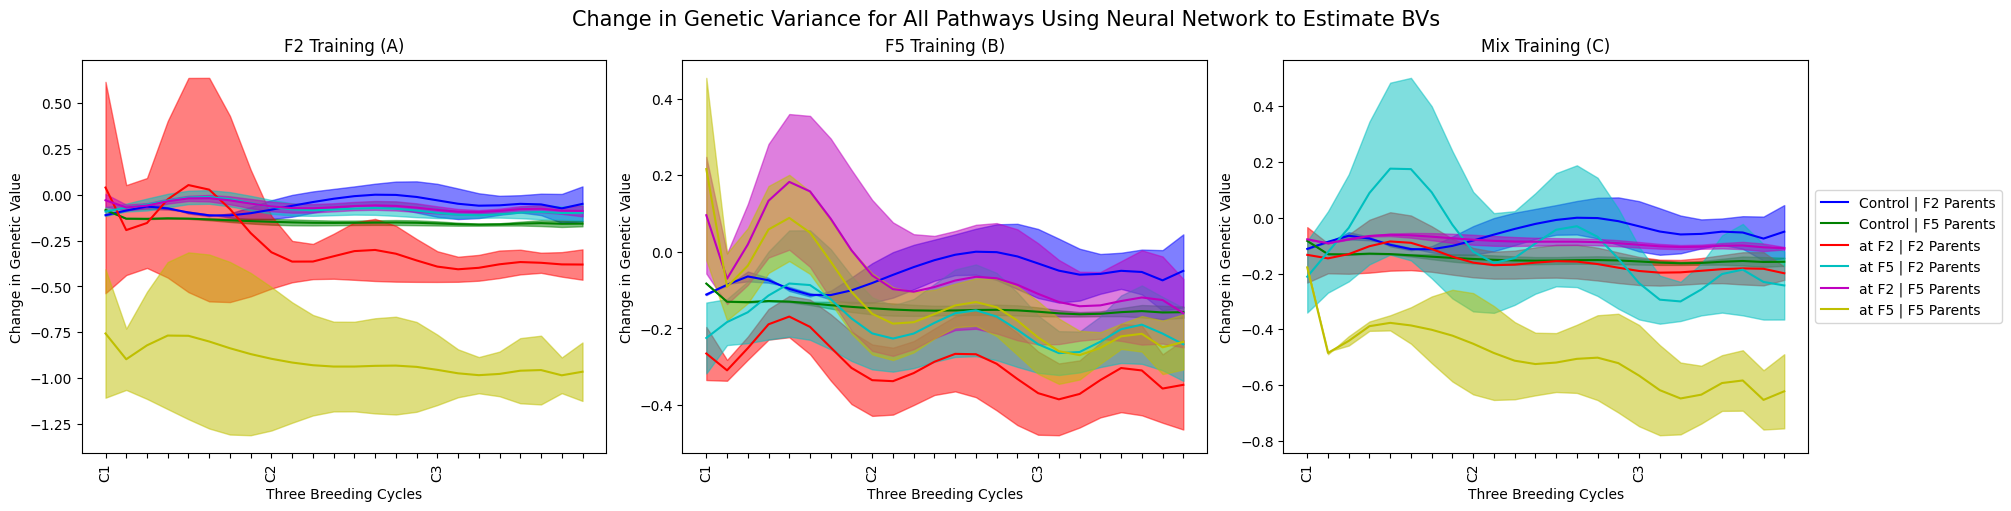

In [85]:
labels = ["F2 Training (A)","F5 Training (B)","Mix Training (C)","All Training (D)"]
sublabels = ["Control | F2 Parents","Control | F5 Parents","at F2 | F2 Parents","at F5 | F2 Parents","at F2 | F5 Parents","at F5 | F5 Parents"]
x = np.array(x)
x = x.flatten()

fig, axs = plt.subplots(1,3,figsize=(20, 5),layout='constrained')
fig.suptitle('Change in Genetic Variance for All Pathways Using Neural Network to Estimate BVs', fontsize=15)


for trn in range(3):
    resp = pd.DataFrame(allYs[trn])
    resp['axis'] = 0.0
    std = pd.DataFrame(allSTD[trn])
    std['axis'] = 0.0
    for i in range(6):
        y = resp.iloc[:, i]
        value = std.iloc[:, i]
        poly = np.polyfit(x, y, 10)
        poly_y = np.poly1d(poly)(x)
        poly2 = np.polyfit(x, value, 10)
        poly_val = np.poly1d(poly2)(x)
        axs[trn].plot(x, poly_y, color=color[i], label=sublabels[i])
        axs[trn].fill_between(x, poly_y + poly_val, poly_y - poly_val, color=color[i], alpha=0.5)  # Plot every line with error bars one by one
        axs[trn].set_title(labels[trn])  # Set title
        axs[trn].set_xticks(x)  # Change x-axis labels
        axs[trn].set_xticklabels(x_lab, rotation=90)
        axs[trn].set_ylabel("Change in Genetic Value")  # y label
        axs[trn].set_xlabel("Three Breeding Cycles")  # y label
        if trn == 2:
          axs[trn].legend(loc='center left', bbox_to_anchor=(1, 0.5))  # Add legend after plotting all lines

plt.show()
